SCI图表复现：整合数据分布与相关系数的高级可视化策略

In [1]:
import np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# 示例数据集

df = pd.DataFrame(np.random.randn(100, 10), columns=["M", "V", "D", "t", "w", "n", "fy", "fc", "L", "d"])
df.head()

,M,V,D,t,w,n,fy,fc,L,d
0,0.478851,0.653850,0.754215,-0.769871,-0.933815,1.074945,-0.907540,-0.066501,0.161925,-0.628903
1,0.069980,0.851423,-1.405506,0.271095,0.149821,-1.110156,-1.166543,-0.129493,-0.116396,1.767856
2,-1.627516,-0.392746,0.719635,1.611939,0.775566,0.352430,1.286527,2.021860,0.885690,0.351157
3,0.078617,0.611730,0.354397,-0.619821,-1.133775,-1.755733,0.813613,-1.524609,1.421933,0.282172
4,-0.496374,-0.015266,0.347894,0.305796,2.815842,-2.300517,0.843469,-1.546548,-0.133894,0.321388


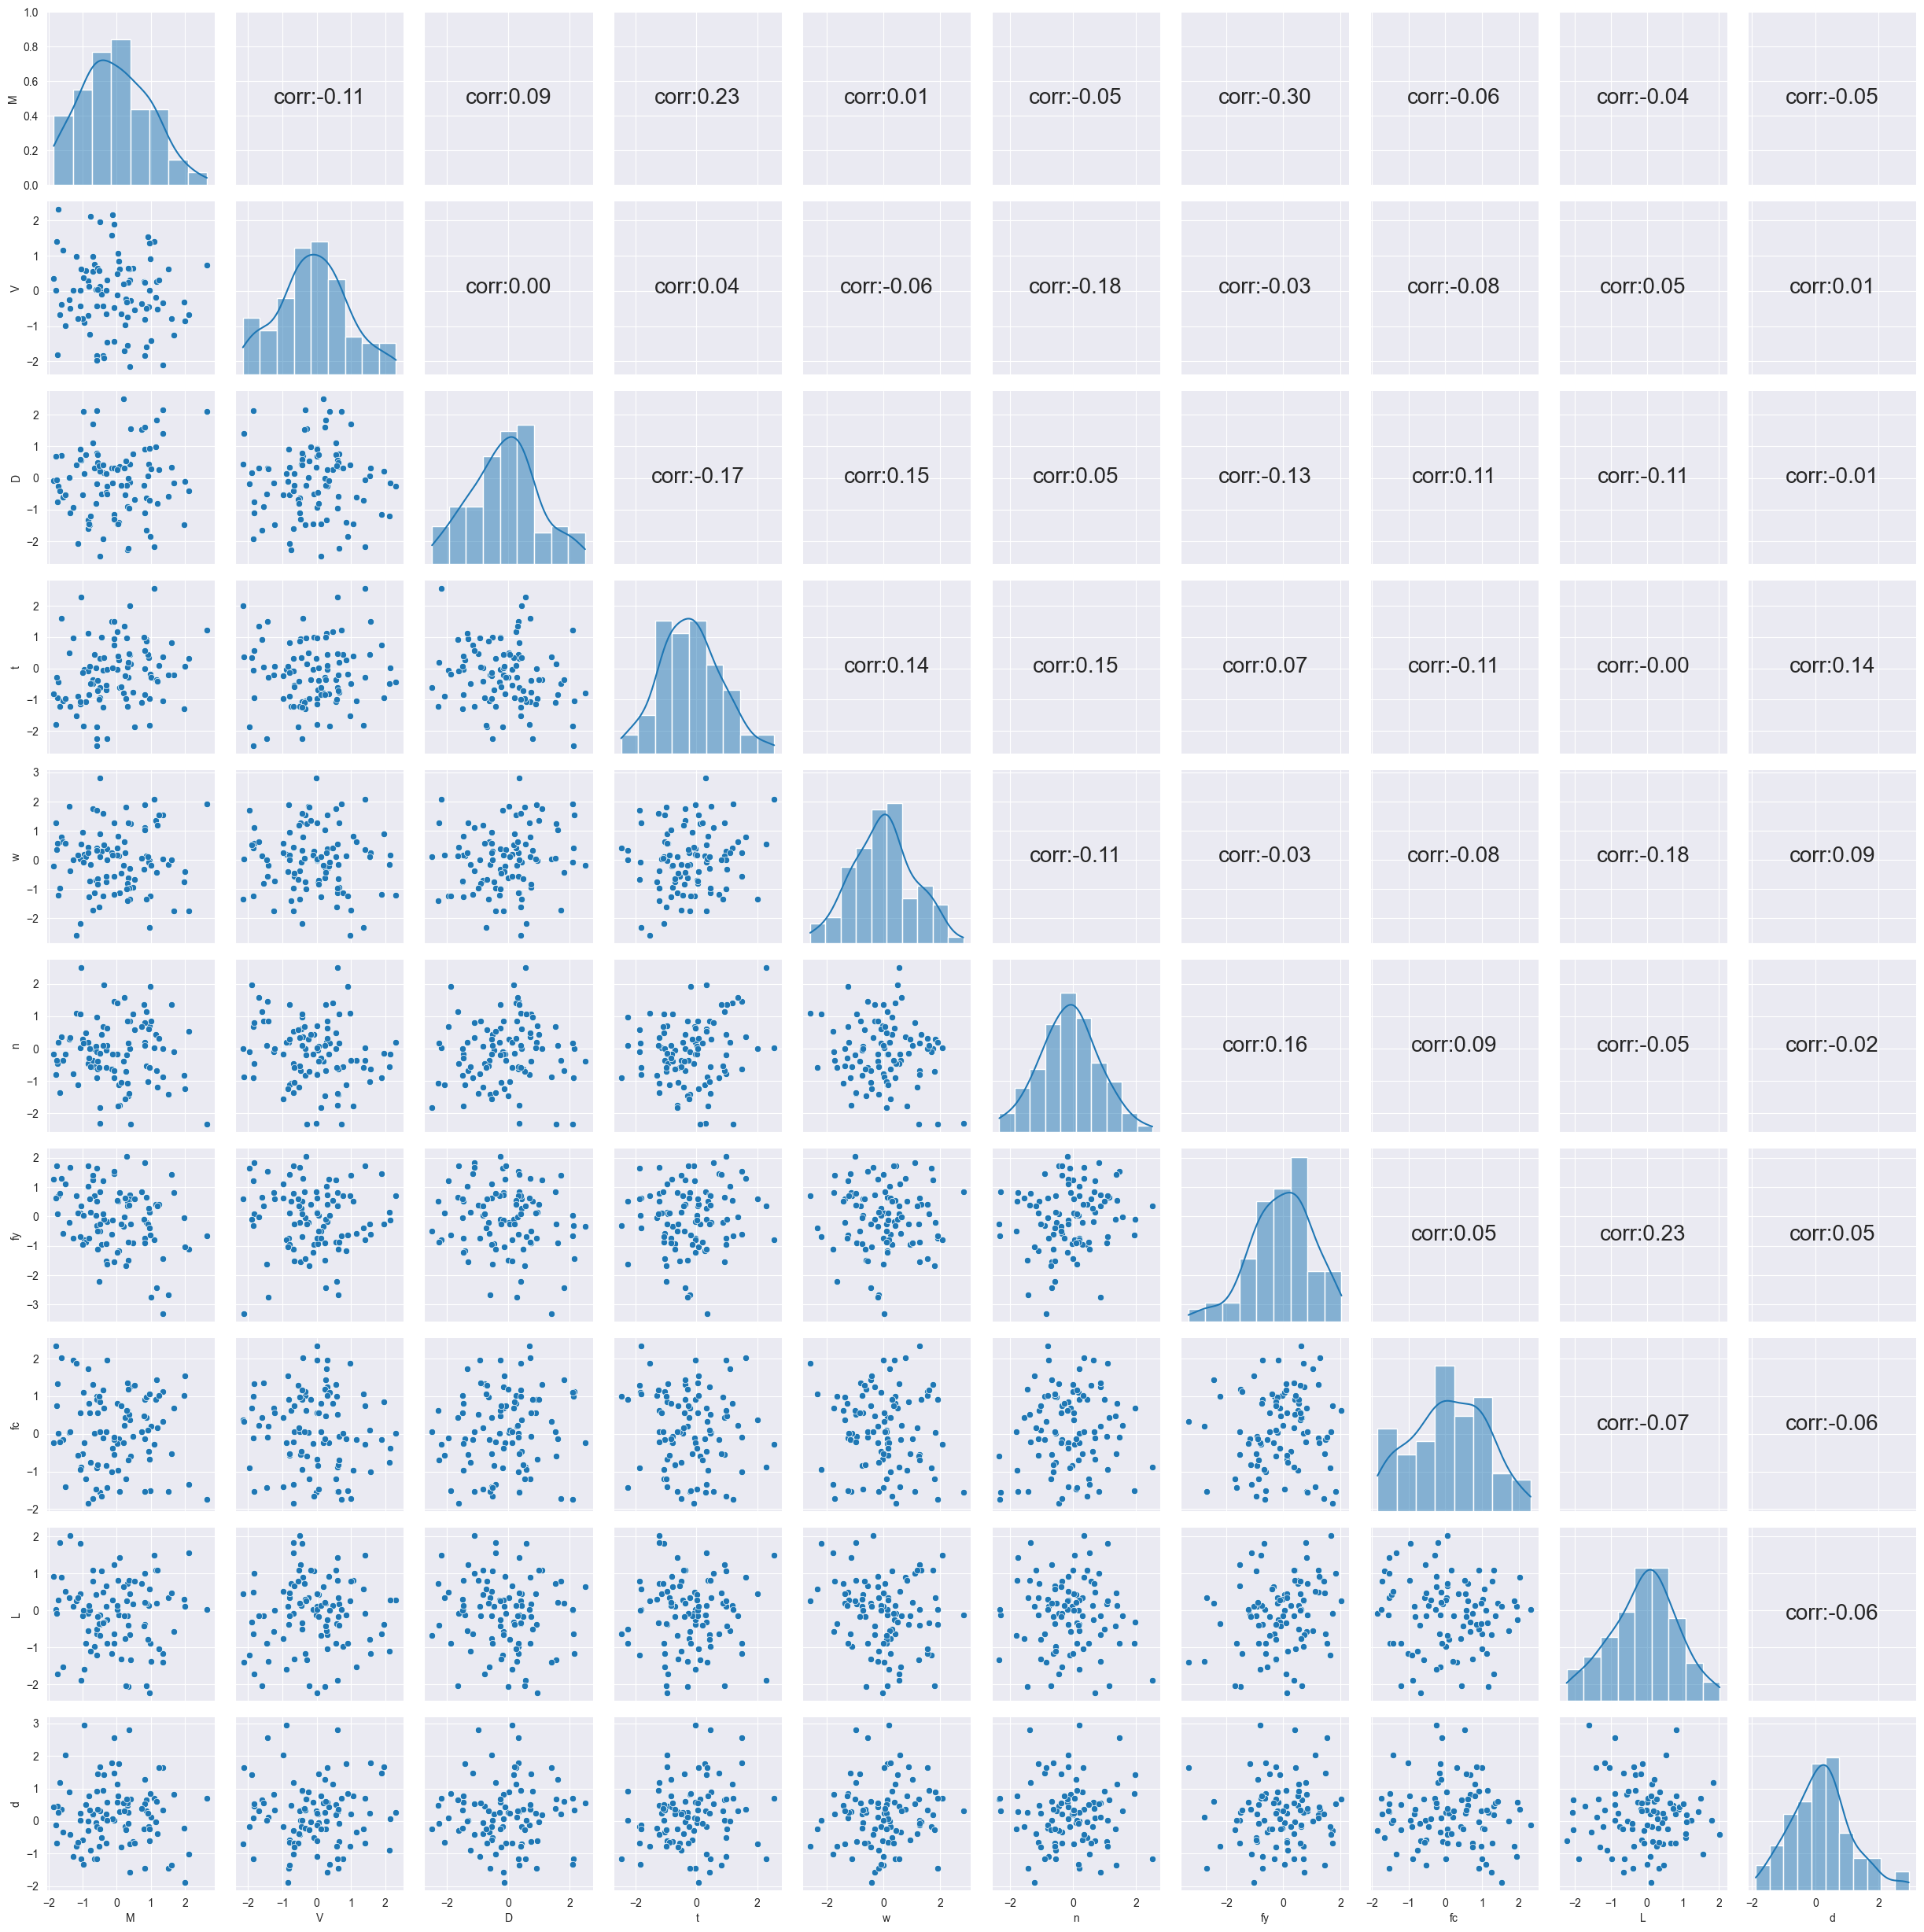

In [2]:
# 计算皮尔逊相关系数矩阵
corr = df.corr()
# 创建 PairGrid
g = sns.PairGrid(df)
# 左下角绘制散点图
g.map_lower(sns.scatterplot)
# 对角线绘制直方图
g.map_diag(sns.histplot, kde=True)
# 右上角显示相关系数
for i, j in zip(*np.triu_indices_from(corr, 1)):    
    g.axes[i, j].annotate(f'corr:{corr.iloc[i, j]:.2f}', (0.5, 0.5),                          
                          textcoords='axes fraction', ha='center', va='center', fontsize=20)    
plt.savefig("第一种.pdf", format='pdf', bbox_inches='tight')
plt.show()

改进——修改相关系数部分为热图

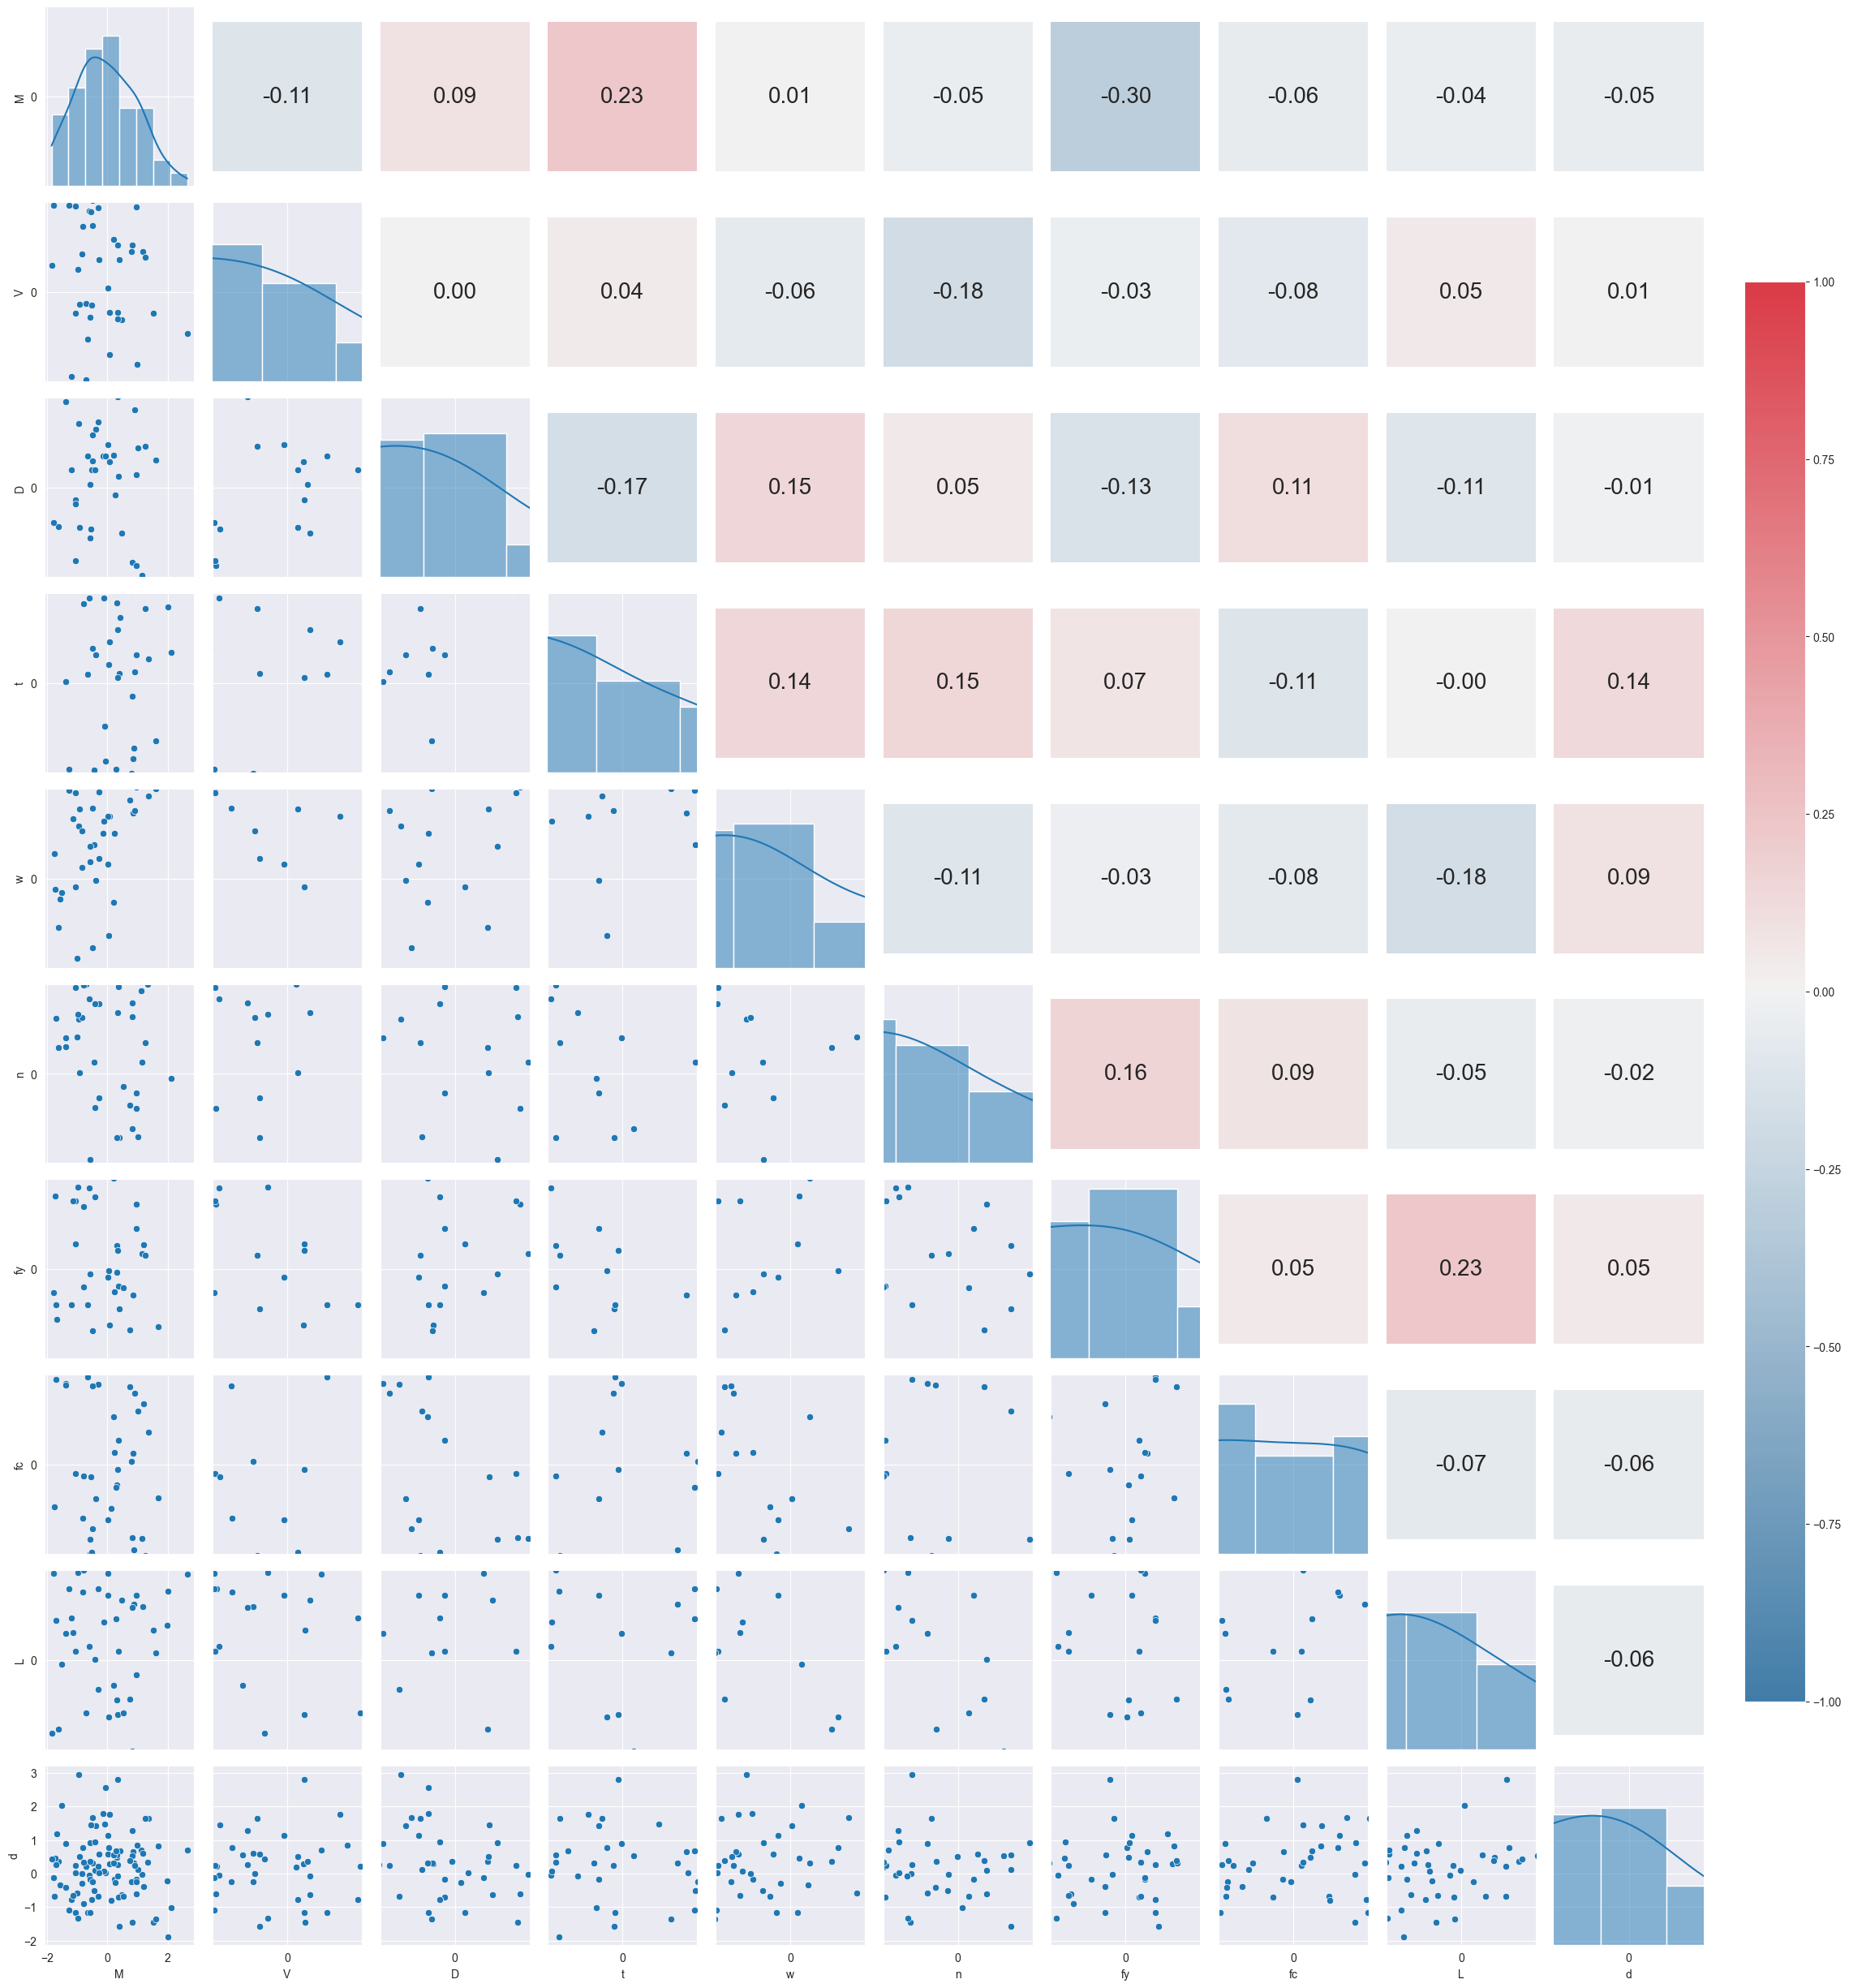

In [3]:
corr = df.corr()
g = sns.PairGrid(df)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
fig = g.fig
# 右上角替换为热力图（每个子图显示一个相关系数）
for i, j in zip(*np.triu_indices_from(corr, 1)):    
    ax = g.axes[i, j]    
    sns.heatmap(pd.DataFrame([[corr.iloc[i, j]]]), cmap=sns.diverging_palette(240, 10, as_cmap=True),                 
                cbar=False, annot=True, fmt=".2f", square=True, ax=ax, vmin=-1, vmax=1,                
                annot_kws={"size": 20})  # 设置相关系数数字字体大小为12
# 在图形旁边添加全局色条
fig.subplots_adjust(right=0.85)  
# 调整图形右侧空间以显示色条
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])  
# 定义色条位置和大小
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=sns.diverging_palette(240, 10, as_cmap=True), norm=norm)
sm.set_array([])  # 为空数组设置色条
fig.colorbar(sm, cax=cbar_ax)  # 添加全局色条
plt.savefig("第二种.pdf", format='pdf', bbox_inches='tight')
plt.show()